In [1]:
import pandas as pd
import numpy as np

In [2]:
accomodations_data = pd.read_csv("Accommodations_Dataset.csv")

In [3]:
accomodations_data.head()

,Sector,Property Reg Number,Account Name,Rating,Address Line 1,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units,Proprietor Description
0,Fáilte Ireland's Welcome Standard,WSL41340,The Glamping Village at Westport Estate,Welcome Standard - Approved,Westport Estate Glamping Village,Westport,Mayo,F28 TY45,NaN,NaN,Michael Fergus,19,NaN
1,Fáilte Ireland's Welcome Standard,WSL41321,The Courtyard Mews at Longueville House,Welcome Standard - Approved,Longueville House,Mallow,Cork,P51 KC8K,NaN,NaN,Aisling O'Callaghan,1,NaN
2,Fáilte Ireland's Welcome Standard,WSL41326,Elfin Cottage,Welcome Standard - Approved,Cronagort,Doolin,Clare,V95 H0XD,NaN,NaN,Gerry Quinn,1,NaN
3,Fáilte Ireland's Welcome Standard,WSL41325,Russells Cottage,Welcome Standard - Approved,Russells Cottage,Doonnagore,Clare,V95 PD00,NaN,NaN,Gerry Quinn,1,NaN
4,Fáilte Ireland's Welcome Standard,WSL41324,Storytellers Cottage,Welcome Standard - Approved,Luogh South,Doolin,Clare,V95 E4H1,NaN,NaN,Gerry Quinn,1,NaN


In [4]:
accomodations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sector                              2391 non-null   object 
 1   Property Reg Number                 2391 non-null   object 
 2   Account Name                        2391 non-null   object 
 3   Rating                              2390 non-null   object 
 4   Address Line 1                      2377 non-null   object 
 5   Address City/Town                   2391 non-null   object 
 6   Address County                      2391 non-null   object 
 7   Eircode/Postal code                 2377 non-null   object 
 8   Latitude                            1909 non-null   float64
 9   Longitude                           1908 non-null   float64
 10  Owner(s) as it appears on Register  2390 non-null   object 
 11  Total Units                         2391 no

In [5]:
accomodations_data.isnull().sum()

Sector                                   0
Property Reg Number                      0
Account Name                             0
Rating                                   1
Address Line 1                          14
Address City/Town                        0
Address County                           0
Eircode/Postal code                     14
Latitude                               482
Longitude                              483
Owner(s) as it appears on Register       1
Total Units                              0
Proprietor Description                1207
dtype: int64

In [6]:
accomodations_data = accomodations_data.drop(columns=['Proprietor Description'])

In [7]:
accomodations_data.isnull().sum()

Sector                                  0
Property Reg Number                     0
Account Name                            0
Rating                                  1
Address Line 1                         14
Address City/Town                       0
Address County                          0
Eircode/Postal code                    14
Latitude                              482
Longitude                             483
Owner(s) as it appears on Register      1
Total Units                             0
dtype: int64

In [8]:
accomodations_data = accomodations_data.dropna(subset=['Latitude', 'Longitude'])

In [9]:
accomodations_data.isnull().sum()

Sector                                 0
Property Reg Number                    0
Account Name                           0
Rating                                 1
Address Line 1                        13
Address City/Town                      0
Address County                         0
Eircode/Postal code                    2
Latitude                               0
Longitude                              0
Owner(s) as it appears on Register     0
Total Units                            0
dtype: int64

In [10]:
accomodations_data = accomodations_data.drop(columns=['Address Line 1'])

In [11]:
accomodations_data = accomodations_data.dropna(subset=['Rating', 'Eircode/Postal code'])

In [12]:
accomodations_data.isnull().sum()

Sector                                0
Property Reg Number                   0
Account Name                          0
Rating                                0
Address City/Town                     0
Address County                        0
Eircode/Postal code                   0
Latitude                              0
Longitude                             0
Owner(s) as it appears on Register    0
Total Units                           0
dtype: int64

In [13]:
# Standardizing Ratings

rating_mapping = {
    'Hotel - 5 Star': 5,
    'Hotel - 4 Star': 4,
    'Welcome Standard - Approved': 3, 
    'Holiday Cottage Approved': 3,
}

accomodations_data['Rating'] = accomodations_data['Rating'].replace(rating_mapping)

accomodations_data['Rating'] = pd.to_numeric(accomodations_data['Rating'], errors='coerce')

print("\nStandardized Ratings:")
print(accomodations_data['Rating'].head())


Standardized Ratings:
16    5.0
17    4.0
18    4.0
19    NaN
20    4.0
Name: Rating, dtype: float64


In [14]:
# # Standardizing Ratings

# county_mapping = {
#     'Hotel - 5 Star': 5,
#     'Hotel - 4 Star': 4,
#     'Welcome Standard - Approved': 3, 
#     'Holiday Cottage Approved': 3,
# }

# accomodations_data['Rating'] = accomodations_data['Rating'].replace(rating_mapping)

# accomodations_data['Rating'] = pd.to_numeric(accomodations_data['Rating'], errors='coerce')

# print("\nStandardized Ratings:")
# print(accomodations_data['Rating'].head())

In [15]:
accomodations_data.isnull().sum()

Sector                                   0
Property Reg Number                      0
Account Name                             0
Rating                                1273
Address City/Town                        0
Address County                           0
Eircode/Postal code                      0
Latitude                                 0
Longitude                                0
Owner(s) as it appears on Register       0
Total Units                              0
dtype: int64

In [16]:
accomodations_data['Rating'].fillna(accomodations_data['Rating'].mode()[0], inplace=True)

In [17]:
accomodations_data.isnull().sum()

Sector                                0
Property Reg Number                   0
Account Name                          0
Rating                                0
Address City/Town                     0
Address County                        0
Eircode/Postal code                   0
Latitude                              0
Longitude                             0
Owner(s) as it appears on Register    0
Total Units                           0
dtype: int64

In [18]:
accomodations_data.head()

,Sector,Property Reg Number,Account Name,Rating,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units
16,Hotel,HHS04204,Druids Glen Hotel & Golf Resort,5.0,Newtownmountkennedy,Wicklow,A63 DW08,53.09163,-6.07879,Leila Ryan,144
17,Hotel,HHS01704,Glenview Hotel,4.0,Wicklow,Wicklow,A63 DC95,53.14226,-6.12708,John O'Farrell,72
18,Hotel,HHS04343,The Western Hotel,4.0,Galway city,Galway,H91 Y3FA,53.27641,-9.04788,Eugene Keville,43
19,Hotel,HHS04007,Hotel Isaacs,4.0,Cork,Cork,T23 F6EK,51.90159,-8.46809,Clement Gleeson,47
20,Hotel,HHS04011,Maldron Hotel Pearse Street,4.0,Dublin 2,Dublin,D02 RK37,53.34328,-6.24411,Sean McKeon,126


In [19]:
accomodations_data['Address County'].unique()

array(['Wicklow', 'Galway', 'Cork', 'Dublin', 'Wexford', 'Kerry', 'Mayo',
       'Tipperary', 'Clare', 'Waterford', 'Kilkenny', 'Westmeath',
       'Roscommon', 'Donegal', 'Laois', 'Limerick', 'Kildare', 'Sligo',
       'Leitrim', 'Louth', 'Cavan', 'Monaghan', 'Meath', 'Longford',
       'Carlow', 'Offaly'], dtype=object)

In [20]:
# Standardizing Ratings

county_mapping = {
    'Wicklow': 1, 
    'Galway': 2, 
    'Cork': 3, 
    'Dublin': 4, 
    'Wexford': 5, 
    'Kerry': 6, 
    'Mayo': 7,
    'Tipperary': 8, 
    'Clare': 9, 
    'Waterford': 10, 
    'Kilkenny': 11, 
    'Westmeath': 12,
    'Roscommon': 13, 
    'Donegal': 14, 
    'Laois': 15, 
    'Limerick': 16, 
    'Kildare': 17, 
    'Sligo': 18,
    'Leitrim': 19, 
    'Louth': 20, 
    'Cavan': 21, 
    'Monaghan': 22, 
    'Meath': 23, 
    'Longford': 24,
    'Carlow': 25, 
    'Offaly' : 26,
}

accomodations_data['Address County'] = accomodations_data['Address County'].replace(rating_mapping)

accomodations_data['Address County'] = pd.to_numeric(accomodations_data['Rating'], errors='coerce')

print("\nStandardized Counties:")
print(accomodations_data['Address County'].head())


Standardized Counties:
16    5.0
17    4.0
18    4.0
19    4.0
20    4.0
Name: Address County, dtype: float64


In [21]:
accomodations_data.head()

,Sector,Property Reg Number,Account Name,Rating,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units
16,Hotel,HHS04204,Druids Glen Hotel & Golf Resort,5.0,Newtownmountkennedy,5.0,A63 DW08,53.09163,-6.07879,Leila Ryan,144
17,Hotel,HHS01704,Glenview Hotel,4.0,Wicklow,4.0,A63 DC95,53.14226,-6.12708,John O'Farrell,72
18,Hotel,HHS04343,The Western Hotel,4.0,Galway city,4.0,H91 Y3FA,53.27641,-9.04788,Eugene Keville,43
19,Hotel,HHS04007,Hotel Isaacs,4.0,Cork,4.0,T23 F6EK,51.90159,-8.46809,Clement Gleeson,47
20,Hotel,HHS04011,Maldron Hotel Pearse Street,4.0,Dublin 2,4.0,D02 RK37,53.34328,-6.24411,Sean McKeon,126


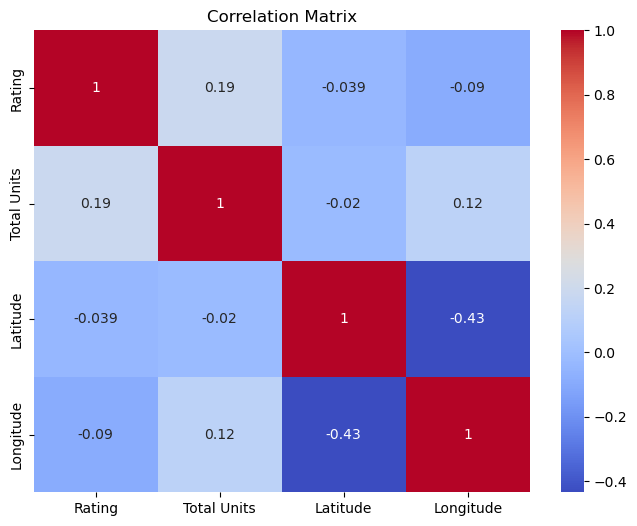

In [23]:
numerical_columns = ['Rating', 'Total Units', 'Latitude', 'Longitude']
df_numerical = accomodations_data[numerical_columns]

plt.figure(figsize=(8, 6))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [24]:
accomodations_data['Sector'].unique()

array(['Hotel', 'Guest House', 'Holiday Hostel', 'Historic House',
       'Holiday Apartment', 'Caravan and Camping Park',
       "Fáilte Ireland's Welcome Standard", 'B&Bs', 'Holiday Cottage',
       'Youth Hostel', 'Individual Self Catering Cottage',
       'Individual Self Catering Apartment', 'Holiday Camp'], dtype=object)

In [25]:
accomodations_data.to_csv('final_accomodations_data.csv' , index = False)

In [26]:
accomodations_data.head()

,Sector,Property Reg Number,Account Name,Rating,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units
16,Hotel,HHS04204,Druids Glen Hotel & Golf Resort,5.0,Newtownmountkennedy,5.0,A63 DW08,53.09163,-6.07879,Leila Ryan,144
17,Hotel,HHS01704,Glenview Hotel,4.0,Wicklow,4.0,A63 DC95,53.14226,-6.12708,John O'Farrell,72
18,Hotel,HHS04343,The Western Hotel,4.0,Galway city,4.0,H91 Y3FA,53.27641,-9.04788,Eugene Keville,43
19,Hotel,HHS04007,Hotel Isaacs,4.0,Cork,4.0,T23 F6EK,51.90159,-8.46809,Clement Gleeson,47
20,Hotel,HHS04011,Maldron Hotel Pearse Street,4.0,Dublin 2,4.0,D02 RK37,53.34328,-6.24411,Sean McKeon,126


In [27]:
accomodations_data['accommodation_id'] = range(1, len(accomodations_data) + 1)

In [28]:
accomodations_data.head()

,Sector,Property Reg Number,Account Name,Rating,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units,accommodation_id
16,Hotel,HHS04204,Druids Glen Hotel & Golf Resort,5.0,Newtownmountkennedy,5.0,A63 DW08,53.09163,-6.07879,Leila Ryan,144,1
17,Hotel,HHS01704,Glenview Hotel,4.0,Wicklow,4.0,A63 DC95,53.14226,-6.12708,John O'Farrell,72,2
18,Hotel,HHS04343,The Western Hotel,4.0,Galway city,4.0,H91 Y3FA,53.27641,-9.04788,Eugene Keville,43,3
19,Hotel,HHS04007,Hotel Isaacs,4.0,Cork,4.0,T23 F6EK,51.90159,-8.46809,Clement Gleeson,47,4
20,Hotel,HHS04011,Maldron Hotel Pearse Street,4.0,Dublin 2,4.0,D02 RK37,53.34328,-6.24411,Sean McKeon,126,5


In [29]:
cols = ['accommodation_id'] + [col for col in accomodations_data.columns if col != 'accommodation_id']
accomodations_data = accomodations_data[cols]

In [30]:
accomodations_data.head()

,accommodation_id,Sector,Property Reg Number,Account Name,Rating,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units
16,1,Hotel,HHS04204,Druids Glen Hotel & Golf Resort,5.0,Newtownmountkennedy,5.0,A63 DW08,53.09163,-6.07879,Leila Ryan,144
17,2,Hotel,HHS01704,Glenview Hotel,4.0,Wicklow,4.0,A63 DC95,53.14226,-6.12708,John O'Farrell,72
18,3,Hotel,HHS04343,The Western Hotel,4.0,Galway city,4.0,H91 Y3FA,53.27641,-9.04788,Eugene Keville,43
19,4,Hotel,HHS04007,Hotel Isaacs,4.0,Cork,4.0,T23 F6EK,51.90159,-8.46809,Clement Gleeson,47
20,5,Hotel,HHS04011,Maldron Hotel Pearse Street,4.0,Dublin 2,4.0,D02 RK37,53.34328,-6.24411,Sean McKeon,126


In [31]:
accomodations_data['Sector'].unique()

array(['Hotel', 'Guest House', 'Holiday Hostel', 'Historic House',
       'Holiday Apartment', 'Caravan and Camping Park',
       "Fáilte Ireland's Welcome Standard", 'B&Bs', 'Holiday Cottage',
       'Youth Hostel', 'Individual Self Catering Cottage',
       'Individual Self Catering Apartment', 'Holiday Camp'], dtype=object)

In [32]:
# Standardizing Ratings

sector_mapping = {
    'Hotel' : 1,
    'Guest House' : 2,
    'Holiday Hostel': 3,
    'Historic House': 4,
    'Holiday Apartment': 5, 
    'Caravan and Camping Park' : 6,
    "Fáilte Ireland's Welcome Standard": 7,
    'B&Bs' : 13,
    'Holiday Cottage': 8,
    'Youth Hostel': 9,
    'Individual Self Catering Cottage': 10,
    'Individual Self Catering Apartment': 11,
    'Holiday Camp': 12,
}

accomodations_data['Sector'] = accomodations_data['Sector'].replace(sector_mapping)

accomodations_data['Sector'] = pd.to_numeric(accomodations_data['Sector'], errors='coerce')

print("\nStandardized Sectors:")
print(accomodations_data['Sector'].head())


Standardized Sectors:
16    1
17    1
18    1
19    1
20    1
Name: Sector, dtype: int64


In [33]:
# Hybrid Approach

# Clusters which can be made:
# 1. According to Sector ( Recommend Sectors )
# 2. According to Address County
# 3. According to Latitude/Longitude

# No need for tags as tags are for tourist attractions. The tags of accomodations should be more or less the same

In [34]:
# Content Based Filtering


In [35]:
accomodations_data.head()


,accommodation_id,Sector,Property Reg Number,Account Name,Rating,Address City/Town,Address County,Eircode/Postal code,Latitude,Longitude,Owner(s) as it appears on Register,Total Units
16,1,1,HHS04204,Druids Glen Hotel & Golf Resort,5.0,Newtownmountkennedy,5.0,A63 DW08,53.09163,-6.07879,Leila Ryan,144
17,2,1,HHS01704,Glenview Hotel,4.0,Wicklow,4.0,A63 DC95,53.14226,-6.12708,John O'Farrell,72
18,3,1,HHS04343,The Western Hotel,4.0,Galway city,4.0,H91 Y3FA,53.27641,-9.04788,Eugene Keville,43
19,4,1,HHS04007,Hotel Isaacs,4.0,Cork,4.0,T23 F6EK,51.90159,-8.46809,Clement Gleeson,47
20,5,1,HHS04011,Maldron Hotel Pearse Street,4.0,Dublin 2,4.0,D02 RK37,53.34328,-6.24411,Sean McKeon,126


In [38]:
accomodations_data.to_excel('final_accomodations_data_excel.xlsx', index=False)